# Assignment 5
## André Dias (59452); Tiago Rodrigues (49593)

## Problem 1

In [1]:
from pomegranate import *
import pandas as pd

In problem 1, it is intended to use pomegranate to create a Bayesian Network based on the following graph and truth tables:


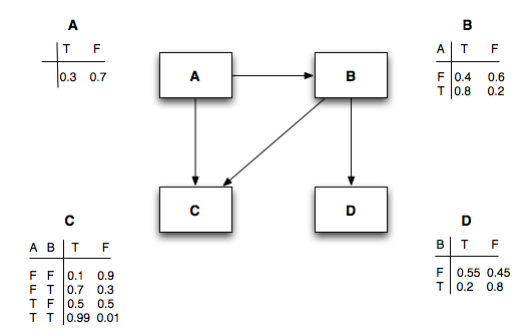


As evidenced in the graph, there is a single node that does not have any inputs, which is node A. As such, this node will have to be created using a discrete distribuition from pomegranate.

On the other hand, all other nodes (B/C/D) have dependencies on other nodes. Due to this, when creating these nodes conditional probability tables from pomegranate must be used.

Each node has two distinct outputs (either True of False). 

Node A, which does not have any dependencies will have a discrete distribuition with only these two options. 

Node B has a dependency on node A, which will lead to 4 conditional probabilities ( P(B = T | A = T); P(B = F | A = T); P(B = T | A = F); P(B = F | A = F) ). 

Node C has dependencies on node A and B, which will lead to 8 conditional probabilities ( P(C = T | A = T and B = T); P(C = T | A = T and B = F); P(C = T | A = F and B = T); P(C = T | A = F and B = F); P(C = F | A = T and B = T); P(C = F | A = F and B = T); P(C = F | A = T and B = F); P(C = F | A = F and B = F) ).

Node D only has a dependency on node B, leading once again to 4 conditional probabilities ( P(D = T | B = T); P(D = F | B = T); P(D = T | B = F); P(D = F | B = F) ).

The initial step is to code these node probabilities, which are all given in their respective truth tables:

In [2]:
node_a = DiscreteDistribution({'T': 0.3, 'F': 0.7})
node_b = ConditionalProbabilityTable(
        [['F', 'T', 0.4],
         ['F', 'F', 0.6],
         ['T', 'T', 0.8],
         ['T', 'F', 0.2]],[node_a])

node_c = ConditionalProbabilityTable(
        [['F', 'F', 'T', 0.1],
         ['F', 'F', 'F', 0.9],
         ['F', 'T', 'T', 0.7],
         ['F', 'T', 'F', 0.3],
         ['T', 'F', 'T', 0.5],
         ['T', 'F', 'F', 0.5],
         ['T', 'T', 'T', 0.99],
         ['T', 'T', 'F', 0.01]],[node_a, node_b])

node_d = ConditionalProbabilityTable(
        [['F', 'T', 0.55],
         ['F', 'F', 0.45],
         ['T', 'T', 0.2],
         ['T', 'F', 0.8]],[node_b])

After creating the node probabilities, the nodes themselves are then created, using their respective probabilities:

In [3]:
a_node = Node(node_a, "A")
b_node = Node(node_b, "B")
c_node = Node(node_c, "C")
d_node = Node(node_d, "D")

With the nodes, it is now possible to make a Bayesian Network. An initial empty model is created, to whom the nodes are added, using the "add_stages" command. Furthermore, the node connections have to then be dictated using the "add_edge" command or the model will give out an error. As such, the previously mentioned dependencies between nodes have to now be modeled using this command. Lastly, the "bake" command is used to create the final network with the nodes and edges.

In [4]:
model = BayesianNetwork()
model.add_states(a_node, b_node, c_node, d_node)
model.add_edge(a_node, b_node)
model.add_edge(a_node, c_node)
model.add_edge(b_node, c_node)
model.add_edge(b_node, d_node)
model.bake()

To compute the desired queries of the exercise, the "predict_proba" command can be used. The input of this command is the conditional condition, for example in a) the question is what is the probability of A = T given that C and D are T. In this case the input is C = T and D = T (the conditional condition). The output of this command provides the probabilities of the remaining nodes of the network being T of F, enumerated in order (A, then B, then C, then D). As such, for each question, is it necessary to choose the apropriate output considering the question itself.

## a) P(A = T | C = T, D = T)

In [5]:
# P(A = T | C = T, D = T) = 0.505 -> node A is the first that appears in the array
model.predict_proba({'C':'T', 'D':'T'})

array([{
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "T" : 0.5054138717420109,
                   "F" : 0.49458612825798914
               }
           ],
           "frozen" : false
       }                                    ,
       {
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "F" : 0.3516850950686168,
                   "T" : 0.6483149049313832
               }
           ],
           "frozen" : false
       }                                    , 'T', 'T'], dtype=object)

## b) P(A = T | D = F)

In [6]:
# P(A = T | D = F) = 0.347 -> node A is the first that appears in the array
model.predict_proba({'D':'F'})

array([{
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "T" : 0.34651898734177244,
                   "F" : 0.6534810126582277
               }
           ],
           "frozen" : false
       }                                     ,
       {
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "F" : 0.34177215189873406,
                   "T" : 0.6582278481012659
               }
           ],
           "frozen" : false
       }                                     ,
       {
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "F" : 0.3915454254125941,
                   "T" : 0.6084545745874058
               }
           ],

## c) P(B = T | C = T)

In [7]:
# P(B = T | C = T) = 0.810 -> node B is the second that appears in the array
model.predict_proba({'C':'T'})

array([{
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "T" : 0.5253830090147861,
                   "F" : 0.4746169909852139
               }
           ],
           "frozen" : false
       }                                    ,
       {
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "F" : 0.1899156736574448,
                   "T" : 0.8100843263425553
               }
           ],
           "frozen" : false
       }                                    , 'T',
       {
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "F" : 0.7335295142199177,
                   "T" : 0.2664704857800823
               }
           ]

## d) P(B = T | A = T, C = T)

In [8]:
# P(B = T | A = T, C = T) = 0.888 -> node B is the first that appears in the array
#                                    since node A is in the conditional condition
model.predict_proba({'A':'T', 'C':'T'})

array(['T', {
                "class" : "Distribution",
                "dtype" : "str",
                "name" : "DiscreteDistribution",
                "parameters" : [
                    {
                        "F" : 0.11210762331838604,
                        "T" : 0.8878923766816139
                    }
                ],
                "frozen" : false
            }                                     , 'T',
       {
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "F" : 0.7607623318385648,
                   "T" : 0.23923766816143516
               }
           ],
           "frozen" : false
       }                                    ], dtype=object)

## e) P(C = T | A = F, B = F, D = F)

In [9]:
# P(C = T | A = F, B = F, D = F) = 0.100 -> node C is the only that appears in the array
model.predict_proba({'A':'F', 'B':'F', 'D':'F'})

array(['F', 'F', {
                     "class" : "Distribution",
                     "dtype" : "str",
                     "name" : "DiscreteDistribution",
                     "parameters" : [
                         {
                             "F" : 0.8999999999999999,
                             "T" : 0.10000000000000016
                         }
                     ],
                     "frozen" : false
                 }                                    , 'F'], dtype=object)

In [10]:
# Dataframe with all results summarized
questions = ['P(A = T | C = T, D = T)', 'P(A = T | D = F)', 'P(B = T | C = T)', 'P(B = T | A = T, C = T)', 'P(C = T | A = F, B = F, D = F)']
probabilities = ['0.505', '0.347', '0.810', '0.888', '0.100']

df = pd.DataFrame([questions, probabilities])
lst = df.T
lst.columns = ['Questions', 'Probabilities']
lst.style.hide(axis="index")


Questions,Probabilities
"P(A = T | C = T, D = T)",0.505
P(A = T | D = F),0.347
P(B = T | C = T),0.810
"P(B = T | A = T, C = T)",0.888
"P(C = T | A = F, B = F, D = F)",0.100


## Problem 2

In problem 2, it is intended to compare Naive Bayes and Random Forest results in a chosen dataset, using both a default model and a model which has been tunned.

The dataset chosen was the breast cancer dataset of scikit-learn. The tunning part was performed through the use of grid search.

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, matthews_corrcoef, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import math

In [12]:
# Load the iris dataset
breast_cancer = load_breast_cancer()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size = 0.25, random_state = 2023)

def Statistics(y_test, y_pred):
    # Compute and print the accuracy, F1 score, recall, and Matthews correlation coefficient and confusion matrix
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    mcc = matthews_corrcoef(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("F1 score:", f1)
    print("Recall:", recall)
    print("Matthews correlation coefficient:", mcc)
    print("Confusion matrix:\n", cm)



def train_and_evaluate_classifier(classifier, X_train, y_train, X_test, y_test):

    # Define the classifier to use
    if classifier == "Naive Bayes":
        # Create the basic Gaussian Naive Bayes classifier
        basic = GaussianNB()
        # Define the parameter dictionary to search
        param_grid = {"var_smoothing": [math.exp(-13), math.exp(-12), math.exp(-11), math.exp(-10), math.exp(-9), math.exp(-8), math.exp(-7), math.exp(-6)]}
        # Grid search to find the best parameters
        clf = GridSearchCV(GaussianNB(), param_grid, cv = 5, n_jobs = -1)
        
    elif classifier == "Random Forest":
        # Create the Random Forest classifier
        basic = RandomForestClassifier(random_state=42)
        # Define the parameter dictionary to search
        param_grid = {"criterion": ["gini", "entropy"], "max_depth": [None, 5, 10, 15], "min_samples_split": [2, 5, 10], "max_leaf_nodes": [None, 5, 10, 20]}
        # Grid search to find the best parameters
        clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv = 5, n_jobs = -1)
    else:
        print("Invalid classifier specified.")
        return

    # Train the basic and tunned classifier on the training set
    basic.fit(X_train, y_train)
    clf.fit(X_train, y_train)

    # Make predictions on the test set using the basic and tunned classifiers
    y_pred_grid = clf.predict(X_test)
    y_pred_basic = basic.predict(X_test)
    
    # Obtain statistics of basic model
    print('The statistics of the basic model are:')
    Statistics(y_test, y_pred_basic)
    
    # Obtain statistics of tunned model
    print("\nBest parameters of the grid search model:", clf.best_params_)
    print('The statistics of the grid search model are:')
    Statistics(y_test, y_pred_grid)
    

In [13]:
train_and_evaluate_classifier("Naive Bayes", X_train, y_train, X_test, y_test)

The statistics of the basic model are:
Accuracy: 0.9440559440559441
F1 score: 0.9435670893471405
Recall: 0.9440559440559441
Matthews correlation coefficient: 0.8798274352952579
Confusion matrix:
 [[47  6]
 [ 2 88]]

Best parameters of the grid search model: {'var_smoothing': 1.670170079024566e-05}
The statistics of the grid search model are:
Accuracy: 0.9370629370629371
F1 score: 0.9360158558019522
Recall: 0.9370629370629371
Matthews correlation coefficient: 0.8663835061269969
Confusion matrix:
 [[45  8]
 [ 1 89]]


As seen by the results obtained, the default Gaussian Naive Bayes gave pretty good results, with an accuracy, F1 score and recall around 0.944 and MCC near 0.880, with only a total of 8 misclassifications.

Even when using grid search to try to optimize the smoothing factor of the model, the smoothing factor that resulted in the best model after grid search, which used k-fold cross validation with the training data, led to poorer results when the model was then tested using the test set, as evidenced by the lower metrics and 1 extra misclassification. As such, it's possible to conclude that the default Gaussian Naive Bayes may actually produce the best results, without the need for parameter optimization.

In [14]:
train_and_evaluate_classifier("Random Forest", X_train, y_train, X_test, y_test)

The statistics of the basic model are:
Accuracy: 0.965034965034965
F1 score: 0.9649650533628434
Recall: 0.965034965034965
Matthews correlation coefficient: 0.9248653204852252
Confusion matrix:
 [[50  3]
 [ 2 88]]

Best parameters of the grid search model: {'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': None, 'min_samples_split': 2}
The statistics of the grid search model are:
Accuracy: 0.965034965034965
F1 score: 0.9649650533628434
Recall: 0.965034965034965
Matthews correlation coefficient: 0.9248653204852252
Confusion matrix:
 [[50  3]
 [ 2 88]]


As seen by the results obtained, the default Random Forest Classifier gave very good results, with an accuracy, F1 score and recall around 0.965 and MCC near 0.925, with only a total of 5 misclassifications.

Even when using grid search to try to optimize the parameters of the model, the parameters that resulted in the best model were only different from the default model in the "criterion" parameter, but actually led to the exactly same results. As such, it's possible to conclude that the default Random Forest Classifier may actually produce the best results, without the need for parameter optimization.

When comparing Gaussian Naive Bayes with the Random Forest Classifier, it's possible to see that the Random Forest led to better results in this particular dataset. Since the Random Forests are an essemble model, it may be the case that an essemble of Decision Trees can capture the essence of the data better than a single Gaussian Naive Bayes model.